# Preview SMD Results from LAMMPS Simulation

In [41]:
# Import necessary packages.
import pandas as pd
import matplotlib.pyplot as plt
import os

In [42]:
# Create a directory to store files generated by this notebook.
out_path = "smd_analysis_output"
if not os.path.exists(out_path):
    os.mkdir(out_path)

## Import and Organize Data

In [43]:
# Read the SMD_Results file into a pandas DataFrame.
fpath = "smd_simulation/SMD_results"
colnames = ['Step','x1','y1','z1','x2','y2','z2','F_x', 'F_y', 'F_z', 'F_tot','R_spring','Ref_dist','PMF']
smd_df = pd.read_csv(fpath,skiprows=[0,1],header=None,names=colnames,delimiter='\s+')

# Create a column that is the change in distance between the reference atoms.
Ref_dist_initial = smd_df.Ref_dist[0]
smd_df['change_ref_dist'] = smd_df.Ref_dist - smd_df.Ref_dist[0]

# Convert force values from kcal/mol/A to pN by 69.5 pN = 1kcal/mol/A
fcols = ['F_x','F_y','F_z','F_tot']
for f in fcols:
    smd_df[f] = smd_df[f]*69.5
    
# Convert positions of the fix and pull atoms to distance column.
smd_df['distance'] = ((smd_df.x2-smd_df.x1) ** 2 + (smd_df.y2 - smd_df.y1) ** 2 + (smd_df.z2 - smd_df.z1) ** 2) ** 0.5

# Get the change in distance between the fix and pull atoms.
smd_df['change_distance'] = smd_df['distance'] - smd_df['distance'][0]

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_267094/980749841.py:4: SyntaxWarning: invalid escape sequence '\s'
  smd_df = pd.read_csv(fpath,skiprows=[0,1],header=None,names=colnames,delimiter='\s+')


In [44]:
# Preview the Pandas DataFrame.
smd_df.head()

,Step,x1,y1,z1,x2,y2,z2,F_x,F_y,F_z,F_tot,R_spring,Ref_dist,PMF,change_ref_dist,distance,change_distance
0,10100,115.376,104.333,27.0999,116.062,108.314,19.2153,0.000000,0.00000,0.00000,0.00000,0.989997,0.999997,0.00000,0.000000,8.859225,0.000000
1,10200,115.375,104.333,27.1005,115.976,108.237,19.0567,227.518675,731.93230,-1016.74330,1251.40310,-0.010003,0.916028,9.60372,-0.083969,8.961313,0.102088
2,10300,115.374,104.332,27.1021,115.945,108.299,18.9811,597.786180,1426.80025,-2013.84590,2479.73915,-1.010000,0.826923,36.74220,-0.173074,9.056145,0.196920
3,10400,115.371,104.331,27.1042,116.316,108.418,18.9452,-918.032450,1794.43440,-3217.59285,3598.86985,-2.010000,0.731507,80.61080,-0.268490,9.174196,0.314971
4,10500,115.371,104.331,27.1044,116.211,108.571,18.7871,-687.046420,1858.96515,-4451.50975,4743.93100,-3.010000,0.505574,139.25800,-0.494423,9.373403,0.514177


## Plot Total Force on the Spring Versus Displacement Between the Reference Atoms

<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_267094/1296811503.py:5: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('change_ref_dist ($\AA$)')


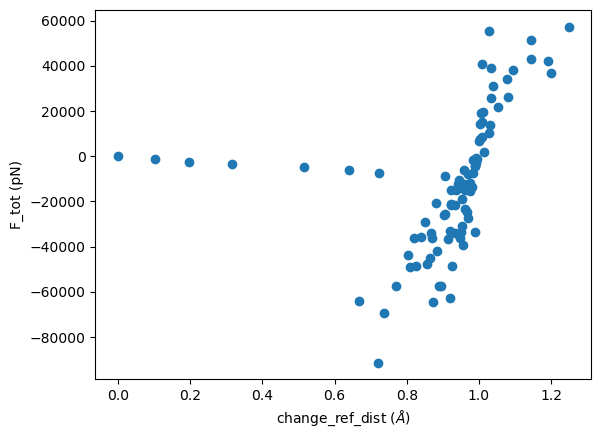

In [46]:
start_frame = 0
fig, ax = plt.subplots()
ax.scatter(smd_df.change_distance[start_frame:], -smd_df.F_tot[start_frame:])
plt.ylabel('F_tot (pN)')
plt.xlabel('change_distance ($\AA$)')
# plt.ylim([0,20000])
plt.show()

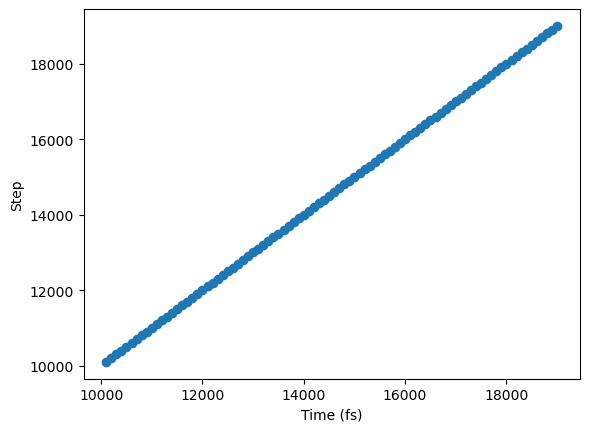

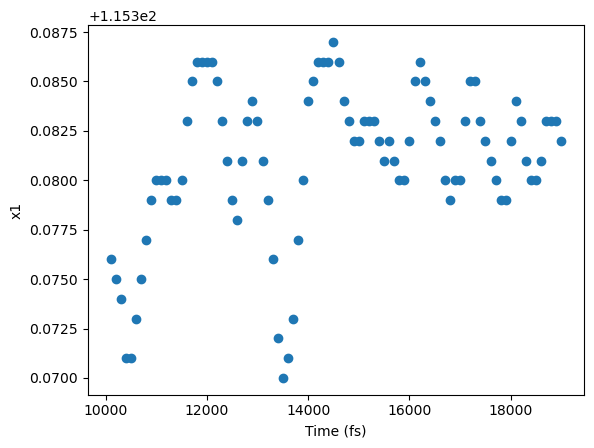

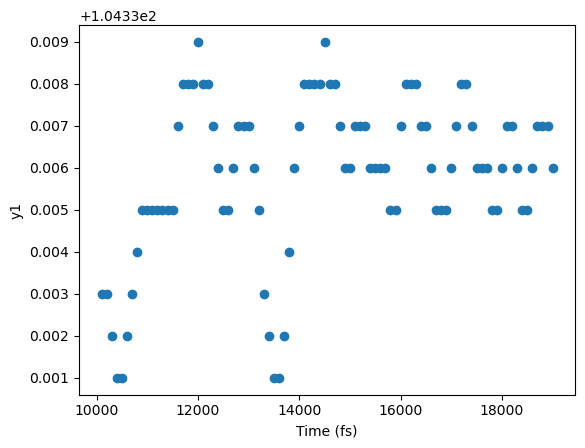

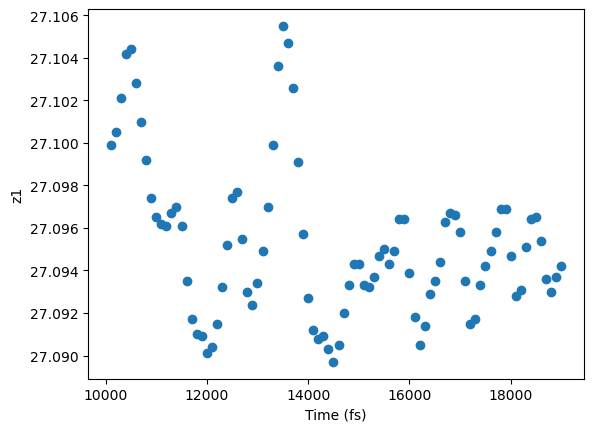

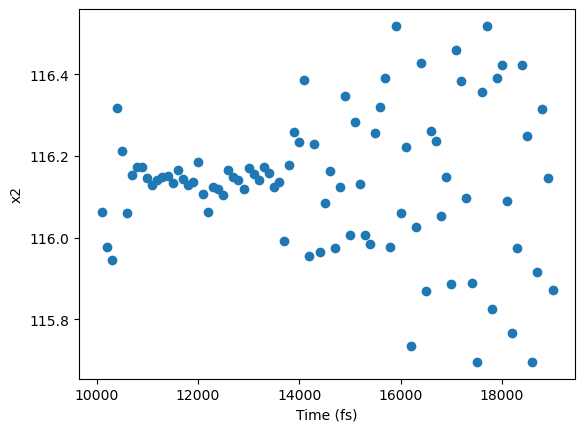

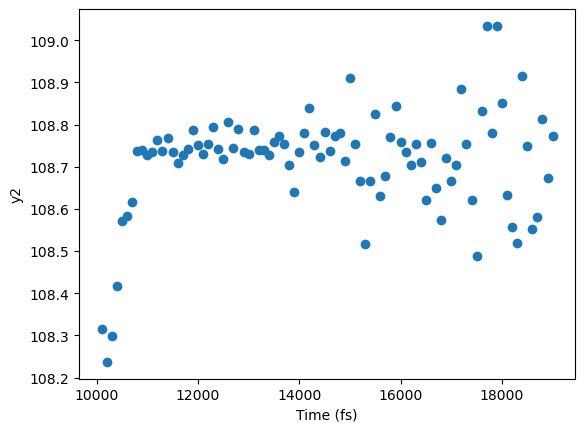

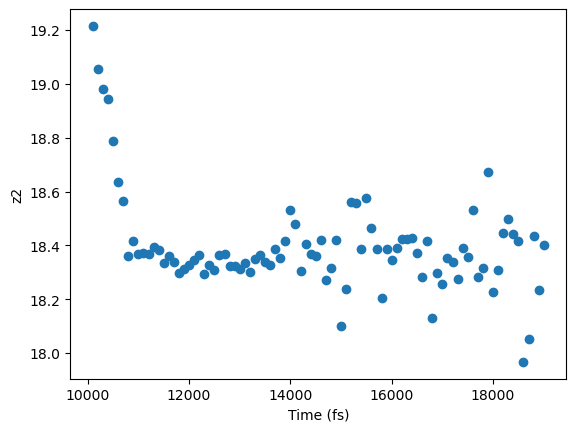

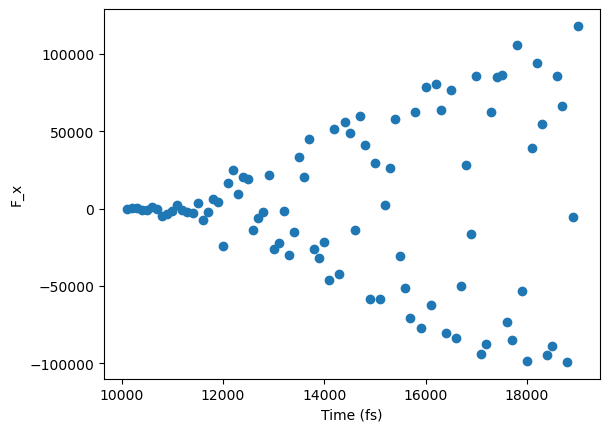

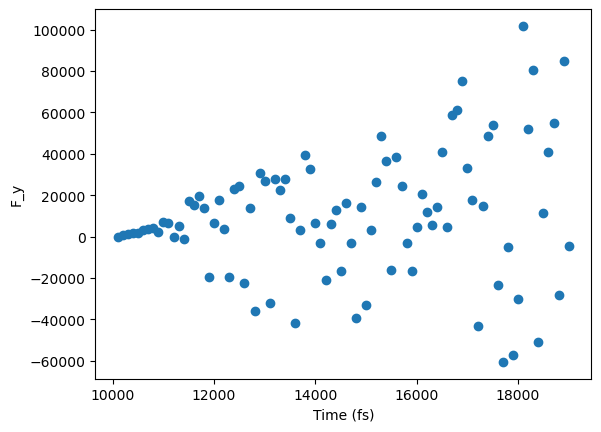

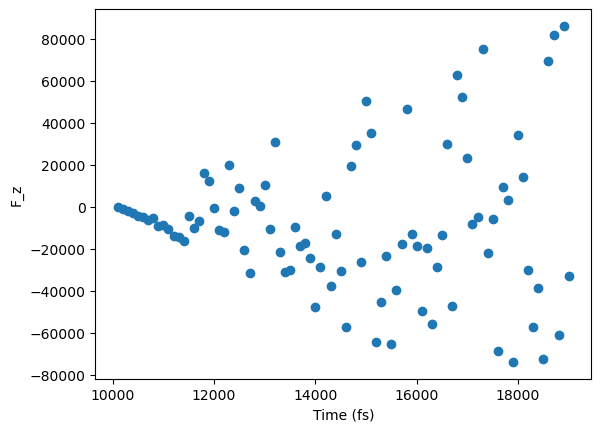

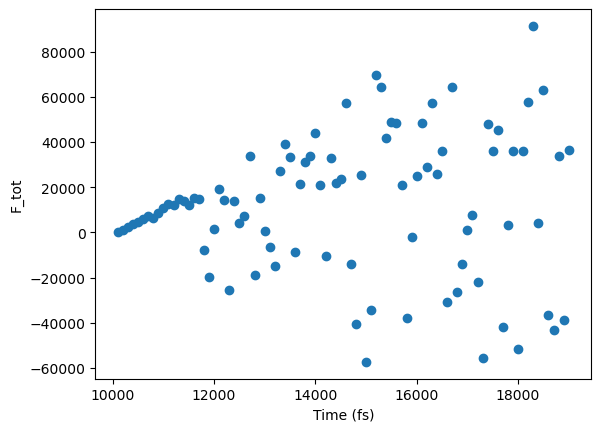

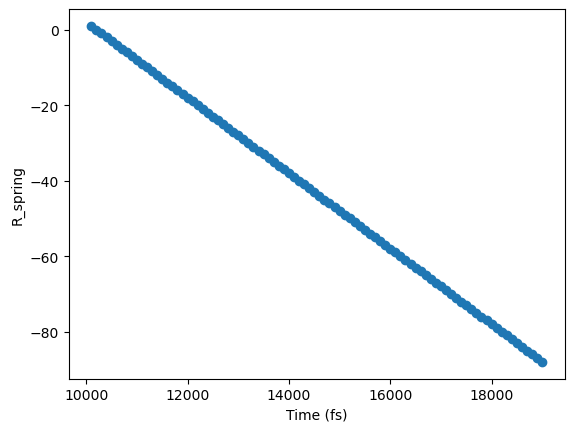

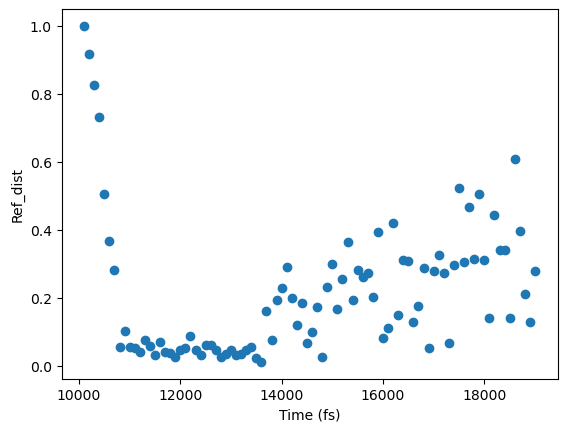

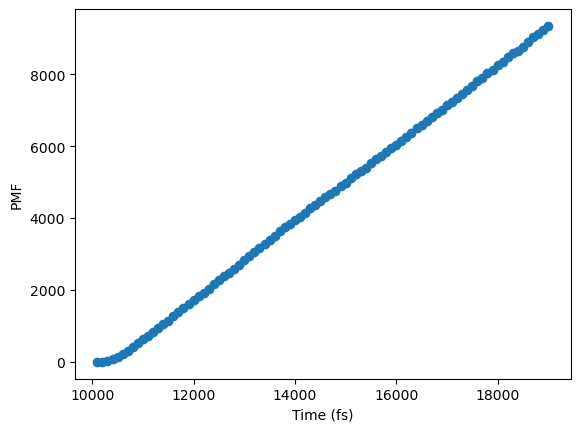

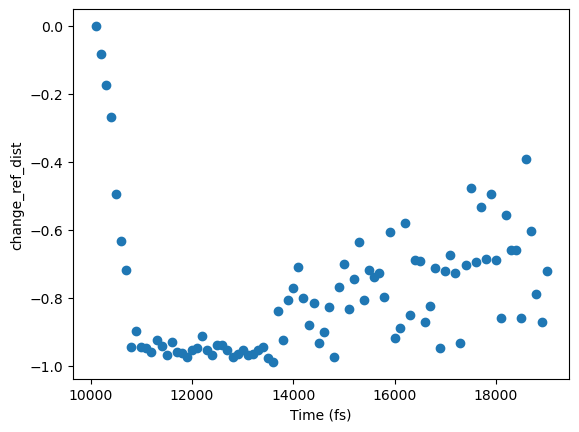

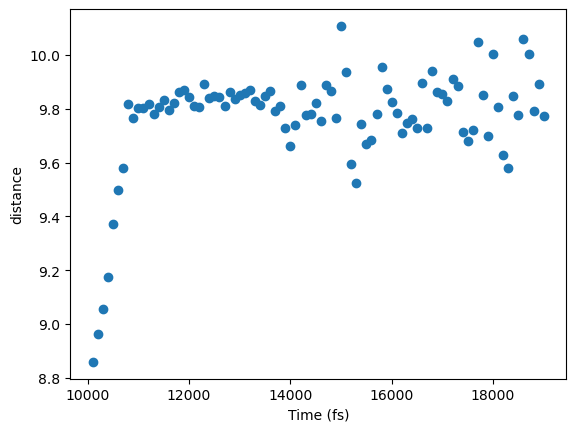

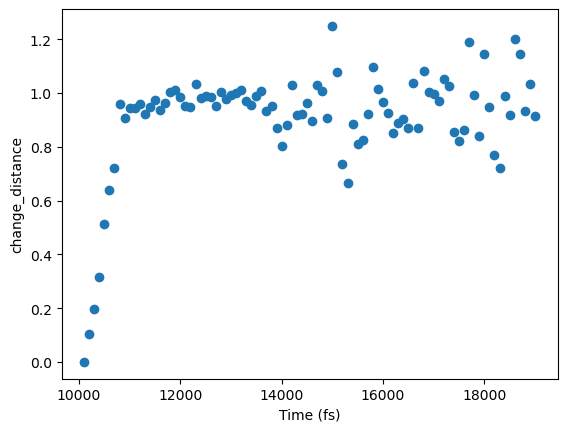

In [47]:
# Plot all columns as a function of time.
for col in smd_df.columns:
    fig, ax = plt.subplots()
    ax.scatter(smd_df.Step[start_frame:],smd_df[col][start_frame:])
    plt.xlabel('Time (fs)')
    plt.ylabel(col)
    plt.show()